<a href="https://colab.research.google.com/github/ashutosh-gupta2111/Exploratory_project/blob/master/Exploratory_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the code of Exploratory Project of Ashutosh Gupta.**

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


Importing all required libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [7]:
labels = os.listdir('/content/grive/MyDrive/train')

In [8]:
print(labels)

['no_yawn', 'Open', 'yawn', 'Closed']


Visualizing a Image

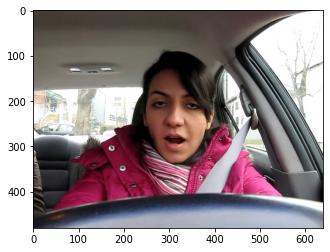

In [9]:
plt.imshow(plt.imread("/content/grive/MyDrive/train/yawn/10.jpg"))

In [10]:
def face_for_yawn(direc="/content/grive/MyDrive/train", face_cas_path="/content/grive/MyDrive/file.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [11]:
def get_data(dir_path="/content/grive/MyDrive/train", face_cas="/content/grive/MyDrive/file.xml", eye_cas="/content/grive/MyDrive/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [12]:
data_train = get_data()

2
3


In [13]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [14]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [15]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [16]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [17]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [18]:
y = np.array(y)


In [19]:
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [20]:
len(X_test)

578

In [21]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [22]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [23]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/20
43/43 [==============================] - 24s 284ms/step - loss: 1.1337 - accuracy: 0.4840 - val_loss: 0.5713 - val_accuracy: 0.7543
Epoch 2/20
43/43 [==============================] - 11s 263ms/step - loss: 0.4908 - accuracy: 0.7892 - val_loss: 0.4326 - val_accuracy: 0.8062
Epoch 3/20
43/43 [==============================] - 11s 263ms/step - loss: 0.3776 - accuracy: 0.8352 - val_loss: 0.3461 - val_accuracy: 0.8702
Epoch 4/20
43/43 [==============================] - 11s 262ms/step - loss: 0.4125 - accuracy: 0.8248 - val_loss: 0.3804 - val_accuracy: 0.8581
Epoch 5/20
43/43 [==============================] - 12s 286ms/step - loss: 0.3237 - accuracy: 0.8641 - val_loss: 0.2741 - val_accuracy: 0.8841
Epoch 6/20
43/43 [==============================] - 11s 263ms/step - loss: 0.2962 - accuracy: 0.8782 - val_loss: 0.2443 - val_accuracy: 0.8962
Epoch 7/20
43/43 [==============================] - 12s 279ms/step - loss: 0.3006 - accuracy: 0.8745 - val_loss: 0.3054 - val_accuracy: 0.8616

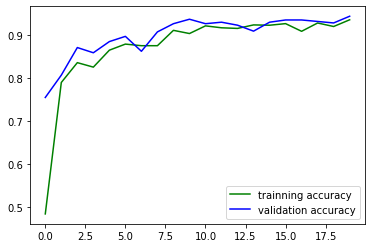

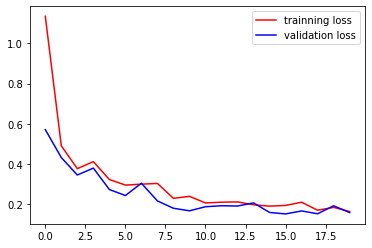

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "g", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "b", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "r", label="trainning loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.legend()
plt.show()

In [25]:
model.save('saved_model/finalmodel')

INFO:tensorflow:Assets written to: saved_model/finalmodel/assets


In [30]:
prediction = np.argmax(model.predict(X_test), axis=-1)

In [31]:
prediction

array([3, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 2, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 0, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 3, 2, 1, 3, 1, 2, 3, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 3, 3, 3, 2, 0, 3, 3, 2, 3,
       3, 0, 0, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 1, 3, 3,
       2, 2, 0, 2, 2, 0, 2, 1, 3, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 1, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 1, 1, 2, 0, 1, 3, 3, 1, 2, 3, 1, 3, 3, 0, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 2, 3, 3, 2, 3, 2,
       2, 1, 2, 2, 1, 3, 2, 0, 2, 2, 1, 3, 2, 3, 1,

In [32]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [33]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.93      0.59      0.72        63
     no_yawn       0.73      0.93      0.82        74
      Closed       0.87      0.99      0.93       215
        Open       0.99      0.88      0.93       226

    accuracy                           0.89       578
   macro avg       0.88      0.85      0.85       578
weighted avg       0.91      0.89      0.89       578

